# Matplotlib练习-B-答案（使用MAG中和“数据可视化”相关的科学文献数据集）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### 0. 请先阅读数据说明。注意：在以下分析中，如果发现数据异常，可以直接进行数据规整和处理。

### 1. 请针对数据集中各文献类型（在doc_type字段）占比做可视化，并对结果进行简要解读。

Text(0.5, 1.1, 'The distribution of doc type')

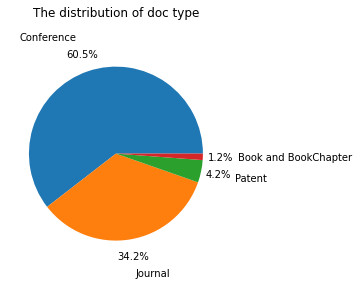

In [2]:
paper_info = pd.read_csv("./dataset/paper_table.txt",sep=";")
doc_type_count = paper_info["doc_type"].value_counts()
index = doc_type_count.index.tolist()[:-2]
values = doc_type_count.values.tolist()[:-2]
index.append("Book and BookChapter")
values.append(doc_type_count[-2:].sum())
plt.axes(aspect='equal')
plt.pie(values,labels=index,autopct='%1.1f%%',pctdistance=1.2,labeldistance=1.4)
plt.title("The distribution of doc type",y=1.1)

### 2. 请对各篇文献中作者数量情况进行可视化，并对结果进行简要解读。

Text(0.5, 1.0, 'The distribution of number of authors')

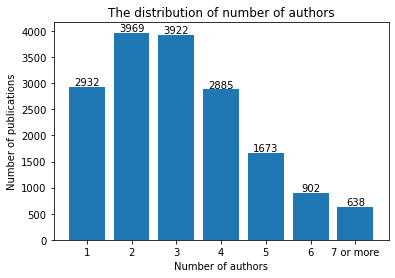

In [12]:
author_info = pd.read_csv("./dataset/author2paper_table.txt",sep=";")
author_count = author_info["paper_id"].value_counts().value_counts().sort_index()
author_count_reframe = author_count[0:6].values.tolist()
author_count_reframe.append(author_count[7:].sum())
label = [1,2,3,4,5,6,"7 or more"]
plt.bar(range(len(author_count_reframe)),author_count_reframe,tick_label=label)
plt.xlabel("Number of authors")
plt.ylabel("Number of publications")
for x,y in zip(range(len(author_count_reframe)),author_count_reframe):
    plt.text(x,y+30,'%d'%y,ha="center")
plt.title("The distribution of number of authors")

### 3. 请对各篇文献被引次数的分布进行可视化，并对结果进行简要解读。

Text(0.5, 1.0, 'The distribution of cited times')

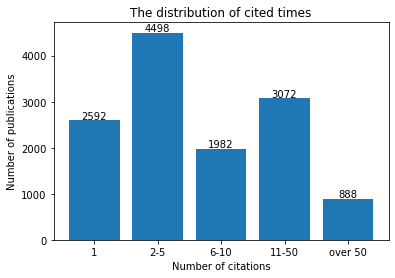

In [13]:
citation_info = pd.read_csv("./dataset/citation_table.txt",sep=";")
cited_count = citation_info["cited_id"].value_counts().values.tolist()
values = [0,0,0,0,0]
label = ["1","2-5","6-10","11-50","over 50"]
for c in cited_count:
    if c==1:
        values[0]+=1
    elif 2<=c<=5:
        values[1]+=1
    elif 6<=c<=10:
        values[2]+=1
    elif 11<=c<=50:
        values[3]+=1
    else:
        values[4]+=1
plt.bar(range(len(values)),values,tick_label=label)
plt.xlabel("Number of citations")
plt.ylabel("Number of publications")
for x,y in zip(range(len(values)),values):
   plt.text(x,y+30,'%d'%y,ha="center")
plt.title("The distribution of cited times")

2、3两题也可以使用hist绘制图形，但为了考虑到图形美观性，使得间距不一样的区间能够在图内占据相等的宽度，因此人工统计后绘制了bar图

### 4. 请对各年度文献的数量规律进行可视化，并对结果进行简要解读。

Text(0.5, 1.0, 'Distribution of number of docs with year')

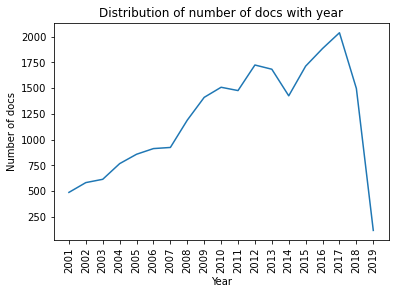

In [14]:
year_count = paper_info["pub_year"].value_counts().sort_index()
count = year_count.values.tolist()
year = year_count.index.tolist()
plt.plot(year,count)
plt.xticks(year,rotation="vertical")
plt.xlabel("Year")
plt.ylabel("Number of docs")
plt.title("Distribution of number of docs with year")

### 5. 请提取出数据集中载文量最大的三本期刊（doc_type为journal），并考察这三本期刊每年发文量随时间的变化如何，对结果进行简要解读。

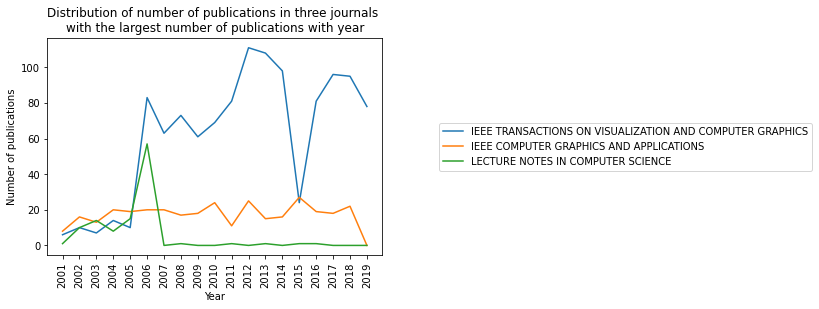

In [15]:
journal_list = paper_info[paper_info.doc_type=="Journal"].journal_id.value_counts().head(3).index.tolist()
index = range(2001,2020)
for journal_id in journal_list:
    count = paper_info[paper_info.journal_id==journal_id]["pub_year"].value_counts().sort_index().reindex(index).fillna(0).astype("int64")
    plt.plot(index,count,label=journal_id.upper())
plt.xticks(year,rotation="vertical")
plt.xlabel("Year")
plt.ylabel("Number of publications")
plt.title("Distribution of number of publications in three journals \nwith the largest number of publications with year")
plt.legend(loc="right",bbox_to_anchor=(2.3, 0.5))